<a href="https://colab.research.google.com/github/YangHyunu/SKT-FLY-AI-5/blob/main/2%EC%A3%BC%EC%B0%A8/19_cnn_%EC%96%91%ED%98%84%EC%9A%B0__.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --q ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 7.63 s (started: 2024-07-01 13:16:16 +00:00)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

time: 622 µs (started: 2024-07-01 13:16:24 +00:00)


## 1.데이터 로드

In [ ]:
#!gdown https://drive.google.com/uc?id=1-MgHBM01grW2O8N-aVO5p5en16Ko-aH5

Downloading...
From (original): https://drive.google.com/uc?id=1-MgHBM01grW2O8N-aVO5p5en16Ko-aH5
From (redirected): https://drive.google.com/uc?id=1-MgHBM01grW2O8N-aVO5p5en16Ko-aH5&confirm=t&uuid=3e460d71-adc0-45a0-849e-021c13eedb58
To: /content/PlantVillage.zip
100% 345M/345M [00:06<00:00, 52.3MB/s]
time: 8.76 s (started: 2024-07-01 13:16:24 +00:00)


In [ ]:
#!unzip /content/PlantVillage.zip

Archive:  /content/PlantVillage.zip
replace PlantVillage/Pepper__bell___Bacterial_spot/0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: time: 1min 26s (started: 2024-07-01 13:16:32 +00:00)


In [ ]:
data_root ='/content/PlantVillage' # Make sure this path is correct

time: 389 µs (started: 2024-07-01 13:17:58 +00:00)


## 2.데이터 로딩

In [ ]:
class_name = ['Late_blight','healthy','Early_blight']

time: 337 µs (started: 2024-07-01 13:17:58 +00:00)


In [ ]:
folder_names = ['Potato___Late_blight', 'Potato___healthy', 'Potato___Early_blight']

time: 281 µs (started: 2024-07-01 13:17:58 +00:00)


In [ ]:
import os

potato_late_blight = os.listdir(data_root+'/Potato___Late_blight')
potato_healthy = os.listdir(data_root+'/Potato___healthy')
potato_early_blight = os.listdir(data_root+'/Potato___Early_blight')

time: 2.54 ms (started: 2024-07-01 13:17:58 +00:00)


In [ ]:
import PIL

X_data = []
y_data = []

for folder_name in folder_names:
    for file_name in os.listdir(data_root+'/'+folder_name):
        image = PIL.Image.open(data_root+'/'+folder_name+'/'+file_name)
        image = image.resize((224,224))
        arr = np.array(image)
        X_data.append(arr)
        y_data.append(folder_names.index(folder_name))
X_data = np.array(X_data)
y_data = np.array(y_data)
len(X_data), len(y_data)

(2152, 2152)

time: 10.6 s (started: 2024-07-01 13:17:58 +00:00)


In [ ]:
print(type(X_data),type(y_data))
print(X_data.shape, y_data.shape) # 컬러라 차원이 3 흑백은 없거나 1

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(2152, 224, 224, 3) (2152,)
time: 530 µs (started: 2024-07-01 13:18:09 +00:00)


## 3. 학습 , 검증 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X_data,y_data,test_size=0.2
                                                  ,random_state=42
                                                  ,shuffle=True)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)


(1721, 224, 224, 3) (431, 224, 224, 3)
(1721,) (431,)
time: 97 ms (started: 2024-07-01 13:18:09 +00:00)


array([[[163, 161, 175],
        [159, 157, 171],
        [161, 159, 173],
        ...,
        [209, 209, 221],
        [209, 209, 221],
        [209, 209, 221]],

       [[147, 145, 159],
        [164, 162, 176],
        [169, 167, 181],
        ...,
        [209, 209, 221],
        [209, 209, 221],
        [209, 209, 221]],

       [[163, 161, 175],
        [154, 152, 166],
        [163, 161, 175],
        ...,
        [209, 209, 221],
        [209, 209, 221],
        [209, 209, 221]],

       ...,

       [[158, 156, 170],
        [179, 177, 191],
        [155, 153, 167],
        ...,
        [201, 200, 214],
        [201, 200, 214],
        [200, 199, 213]],

       [[160, 158, 172],
        [163, 161, 175],
        [162, 160, 174],
        ...,
        [204, 203, 217],
        [202, 201, 215],
        [202, 201, 215]],

       [[166, 164, 178],
        [149, 147, 161],
        [164, 162, 176],
        ...,
        [206, 205, 219],
        [206, 205, 219],
        [206, 205, 219]]], dtype=uint8)
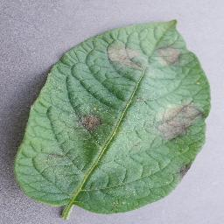

time: 22.4 ms (started: 2024-07-01 13:18:09 +00:00)


In [ ]:
X_train[0]

In [ ]:
np.random.seed(42)
sample = np.random.randint(1721,size=25)
sample # 1721개의 데이터 중 25 가지 뽑인 INDEX값을 가짐

array([1126, 1459,  860, 1294, 1130, 1095, 1044, 1638,  121,  466, 1238,
        330, 1482,   87, 1396, 1123,  871, 1687,  130, 1685, 1332,  769,
        343, 1515, 1437])

time: 7.65 ms (started: 2024-07-01 13:18:09 +00:00)


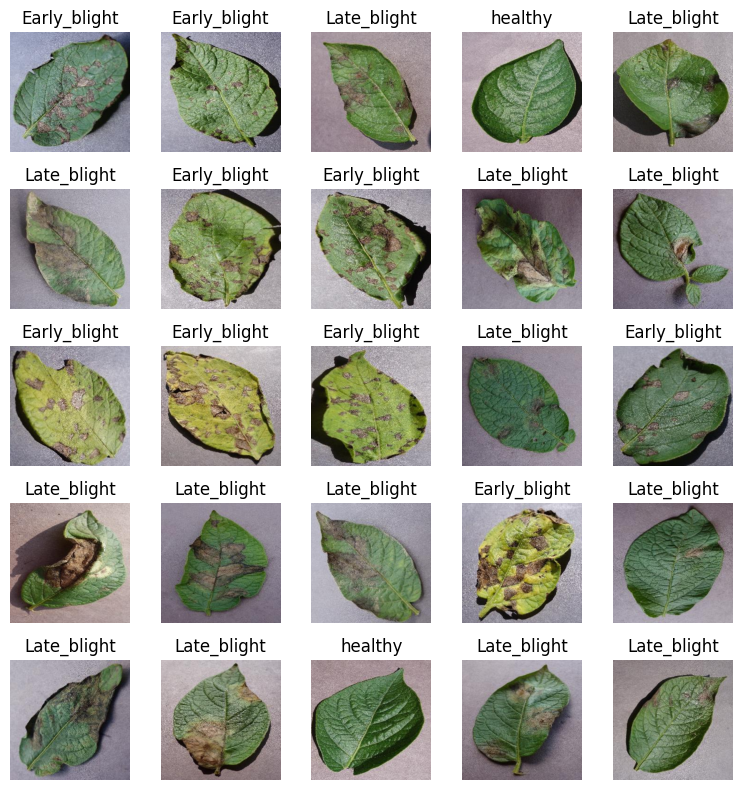

time: 3.57 s (started: 2024-07-01 13:18:09 +00:00)


In [ ]:
plt.figure(figsize=(8,8))
for i, idx in enumerate(sample):
  plt.subplot(5, 5,i+1) # 25개 grid
  plt.imshow(X_train[idx],cmap='gray')
  plt.title(class_name[y_train[idx]]) # 정답값 표시
  plt.axis('off')
  plt.tight_layout()
plt.show()

## 4.전처리
  - 스케일링
  - 원-핫 인코딩

In [ ]:
X_train_s = X_train.astype('float')/255.
X_test_s = X_test.astype('float')/255.

time: 1.18 s (started: 2024-07-01 13:18:13 +00:00)


In [ ]:
from keras import utils
y_train_o= utils.to_categorical(y_train)
y_test_o = utils.to_categorical(y_test)

time: 3.03 ms (started: 2024-07-01 13:18:14 +00:00)


In [ ]:
y_train_o.shape, y_test_o.shape

((1721, 3), (431, 3))

time: 4.47 ms (started: 2024-07-01 13:18:14 +00:00)


In [ ]:
print(y_train[:10])
y_train[:10]

[0 2 1 2 2 2 0 0 0 2]


array([0, 2, 1, 2, 2, 2, 0, 0, 0, 2])

time: 6.38 ms (started: 2024-07-01 13:18:14 +00:00)


In [ ]:
print(X_train_s.shape, X_test_s.shape)
print(y_train_o.shape, y_test_o.shape)


(1721, 224, 224, 3) (431, 224, 224, 3)
(1721, 3) (431, 3)
time: 675 µs (started: 2024-07-01 13:18:14 +00:00)


## 5.모델학습

### CNN

In [ ]:
X_train_s.shape

(1721, 224, 224, 3)

time: 2.79 ms (started: 2024-07-01 13:18:14 +00:00)


In [ ]:
from keras import layers
model = keras.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=3,activation='relu',
                  input_shape=(224,224,3)))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(filters=16, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))

model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(3,activation='softmax'))

time: 75 ms (started: 2024-07-01 13:18:14 +00:00)


In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 111, 111, 32)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 16)      4624      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 54, 54, 16)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 46656)            

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

time: 8.11 ms (started: 2024-07-01 13:18:14 +00:00)


In [ ]:
from keras import callbacks
es = callbacks.EarlyStopping(
    monitor='val_loss',patience=3)
ckpt_path='/temp/PlantVillage.ckpt'
ckpt = callbacks.ModelCheckpoint(
    filepath=ckpt_path,
    monitor='val_loss',
    save_weight_only=True,
    save_best_only=True)

time: 506 µs (started: 2024-07-01 13:18:14 +00:00)


In [ ]:
EPOCHS= 10
BATCH_SIZE= 32
history = model.fit(X_train_s, y_train_o,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    callbacks=[es, ckpt],)
                    # epoch 가 한번 끝날 때 마다 callback, model checkpoint 호출

Epoch 1/10
54/54 [==============================] - ETA: 0s - loss: 1.9588 - accuracy: 0.5967

54/54 [==============================] - 6s 81ms/step - loss: 1.9588 - accuracy: 0.5967
Epoch 2/10
54/54 [==============================] - ETA: 0s - loss: 0.5175 - accuracy: 0.8251

54/54 [==============================] - 4s 66ms/step - loss: 0.5175 - accuracy: 0.8251
Epoch 3/10
54/54 [==============================] - ETA: 0s - loss: 0.3379 - accuracy: 0.8739

54/54 [==============================] - 4s 69ms/step - loss: 0.3379 - accuracy: 0.8739
Epoch 4/10
54/54 [==============================] - ETA: 0s - loss: 0.2787 - accuracy: 0.8879

54/54 [==============================] - 4s 66ms/step - loss: 0.2787 - accuracy: 0.8879
Epoch 5/10
54/54 [==============================] - ETA: 0s - loss: 0.1722 - accuracy: 0.9402

54/54 [==============================] - 4s 66ms/step - loss: 0.1722 - accuracy: 0.9402
Epoch 6/10
54/54 [==============================] - ETA: 0s - loss: 0.1329 - accuracy: 0.9564

54/54 [==============================] - 4s 69ms/step - loss: 0.1329 - accuracy: 0.9564
Epoch 7/10
54/54 [==============================] - ETA: 0s - loss: 0.1135 - accuracy: 0.9576

54/54 [==============================] - 4s 67ms/step - loss: 0.1135 - accuracy: 0.9576
Epoch 8/10
54/54 [==============================] - ETA: 0s - loss: 0.0539 - accuracy: 0.9837

54/54 [==============================] - 4s 66ms/step - loss: 0.0539 - accuracy: 0.9837
Epoch 9/10
54/54 [==============================] - ETA: 0s - loss: 0.0520 - accuracy: 0.9808

54/54 [==============================] - 4s 67ms/step - loss: 0.0520 - accuracy: 0.9808
Epoch 10/10
54/54 [==============================] - ETA: 0s - loss: 0.0265 - accuracy: 0.9942

54/54 [==============================] - 4s 71ms/step - loss: 0.0265 - accuracy: 0.9942
time: 44.1 s (started: 2024-07-01 13:18:14 +00:00)


In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')

    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()

time: 620 µs (started: 2024-07-01 13:18:58 +00:00)


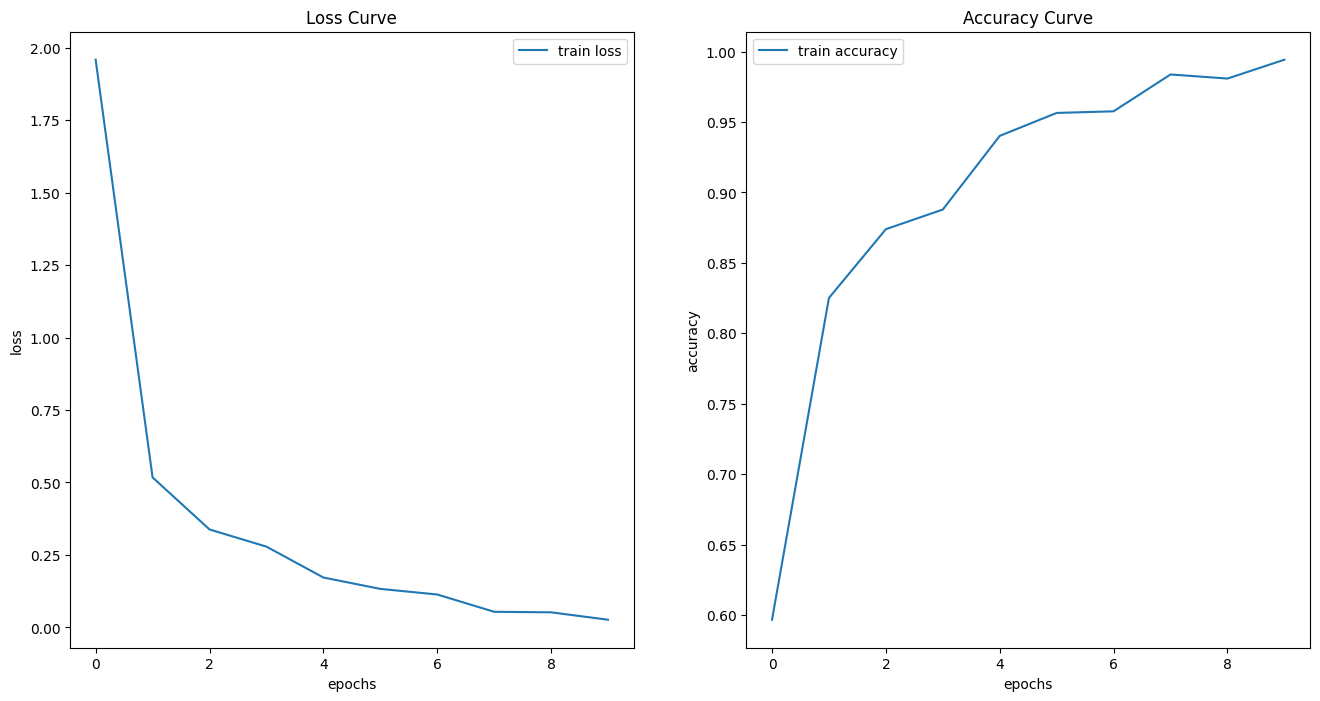

time: 427 ms (started: 2024-07-01 13:18:58 +00:00)


In [ ]:
plot_history(history)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix

def print_metrics(y_true,y_pred,aver='macro'):
  print('accuracy',accuracy_score(y_true,y_pred))
  print('recall',recall_score(y_true,y_pred,average=aver))
  print('precision',precision_score(y_true,y_pred,average=aver))
  print('f1_score',f1_score(y_true,y_pred, average=aver))

  cfm = confusion_matrix(y_true,y_pred)
  s = sns.heatmap(cfm,annot=True,cmap='Blues',fmt='d',cbar=False)
  s.set(xlabel='Prediction',ylabel='Actual')
  plt.show()

time: 812 µs (started: 2024-07-01 13:18:59 +00:00)


In [ ]:
y_pred = model.predict(X_test_s)

14/14 [==============================] - 0s 14ms/step
time: 1.08 s (started: 2024-07-01 13:18:59 +00:00)


In [ ]:
y_pred = np.argmax(y_pred,axis=1)
y_pred[:5]

array([2, 2, 0, 0, 2])

time: 4.56 ms (started: 2024-07-01 13:19:00 +00:00)


accuracy 0.9443155452436195
recall 0.904642350131072
precision 0.8815119803282437
f1_score 0.8921445207124385


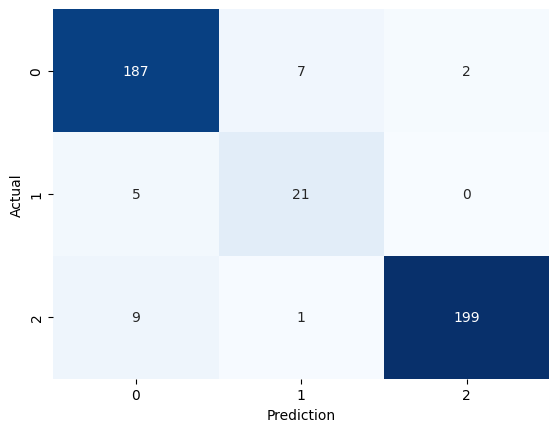

time: 139 ms (started: 2024-07-01 13:19:00 +00:00)


In [ ]:
print_metrics(y_test,y_pred)

### 모델 전이학습 VGG16

In [ ]:
X_train_s.shape

(1721, 224, 224, 3)

time: 5.01 ms (started: 2024-07-01 13:19:00 +00:00)


In [ ]:
from keras.applications import VGG16
base_model = VGG16(
    include_top=False,
    weights="imagenet"
    ,input_shape=( 224, 224, 3))
base_model.trainable = False # base_model을 학습시킬건지 여부
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from keras import layers
model_t= keras.Sequential()
model_t.add(base_model)
model_t.add(layers.Flatten())
model_t.add(layers.Dense(128,activation='relu'))
model_t.add(layers.Dropout(0.2))
model_t.add(layers.Dense(3,activation='softmax'))
model_t.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 25088)             0         
                                                                 
 dense_13 (Dense)            (None, 128)               3211392   
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 3)                 387       
                                                                 
Total params: 17926467 (68.38 MB)
Trainable params: 3211779 (12.25 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________
time: 1

In [ ]:
adam = keras.optimizers.Adam(learning_rate=0.01) # tuning
model_t.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

time: 8.03 ms (started: 2024-07-01 13:19:01 +00:00)


In [ ]:
from keras import callbacks
es = callbacks.EarlyStopping(
    monitor='val_loss',patience=3)
ckpt_path='/temp/cats_dogs.ckpt'
ckpt = callbacks.ModelCheckpoint(
    filepath=ckpt_path,
    save_weight_only=True,
    save_best_only=True)

time: 624 µs (started: 2024-07-01 13:19:01 +00:00)


In [ ]:
EPOCHS = 10
BATCH_SIZE=32

history_t = model_t.fit(X_train_s,y_train_o,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    )

Epoch 1/10
54/54 [==============================] - 22s 238ms/step - loss: 4.3304 - accuracy: 0.8106
Epoch 2/10
54/54 [==============================] - 7s 139ms/step - loss: 0.1719 - accuracy: 0.9442
Epoch 3/10
54/54 [==============================] - 8s 142ms/step - loss: 0.1392 - accuracy: 0.9558
Epoch 4/10
54/54 [==============================] - 8s 140ms/step - loss: 0.1243 - accuracy: 0.9593
Epoch 5/10
54/54 [==============================] - 7s 138ms/step - loss: 0.1126 - accuracy: 0.9605
Epoch 6/10
54/54 [==============================] - 7s 137ms/step - loss: 0.0548 - accuracy: 0.9808
Epoch 7/10
54/54 [==============================] - 7s 136ms/step - loss: 0.0617 - accuracy: 0.9791
Epoch 8/10
54/54 [==============================] - 7s 135ms/step - loss: 0.0492 - accuracy: 0.9826
Epoch 9/10
54/54 [==============================] - 7s 135ms/step - loss: 0.0936 - accuracy: 0.9646
Epoch 10/10
54/54 [==============================] - 7s 135ms/step - loss: 0.0851 - accuracy: 0.971

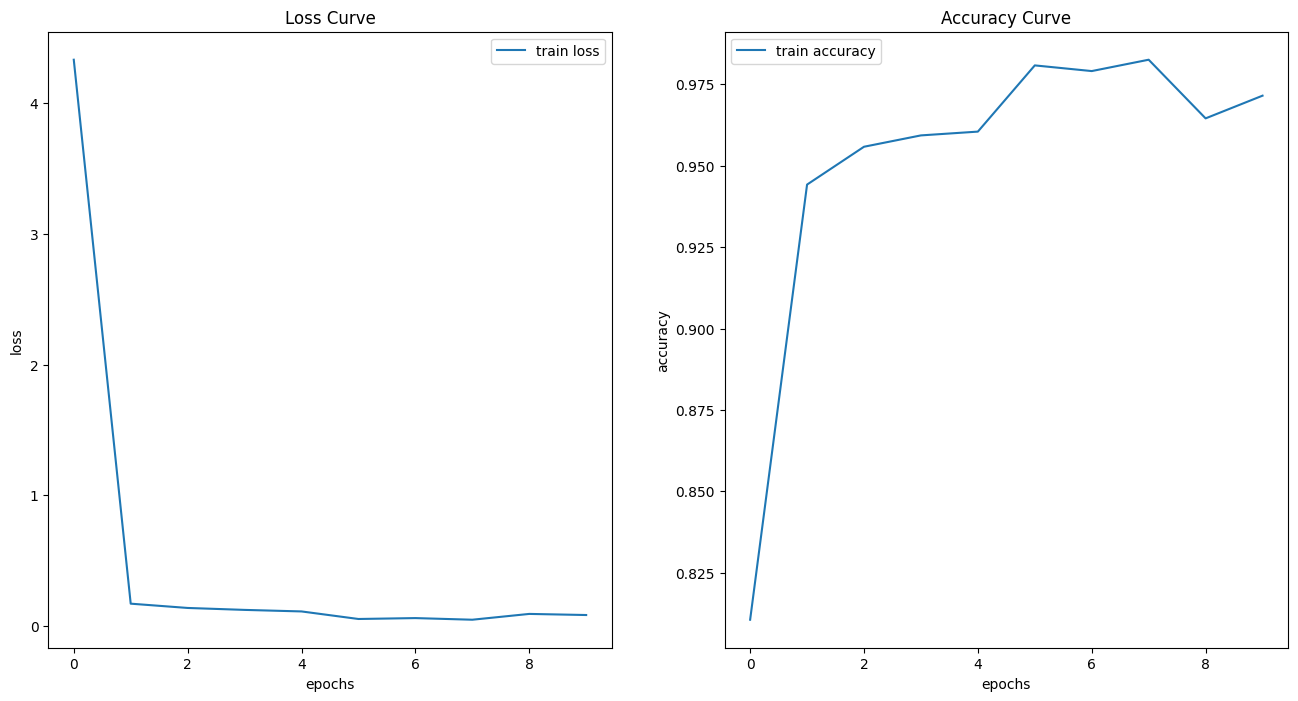

time: 468 ms (started: 2024-07-01 13:20:34 +00:00)


In [ ]:
plot_history(history_t)

In [ ]:
y_pred = model_t.predict(X_test_s)

14/14 [==============================] - 6s 440ms/step
time: 11.3 s (started: 2024-07-01 13:20:34 +00:00)


In [ ]:
y_pred = np.argmax(y_pred,axis=1)
y_pred[:5]

array([2, 2, 0, 0, 2])

time: 3.79 ms (started: 2024-07-01 13:20:46 +00:00)


accuracy 0.9535962877030162
recall 0.9215070643642073
precision 0.9440490890578627
f1_score 0.9316536712150748


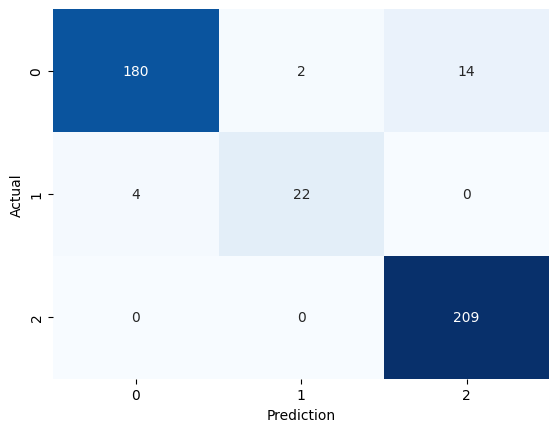

time: 146 ms (started: 2024-07-01 13:20:46 +00:00)


In [ ]:
print_metrics(y_test,y_pred)
